In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# PATH = os.path.join(os.path.dirname("/content/drive/MyDrive/Colab Notebooks/ATIS_dataset"), 'atis_intents.csv')


In [ ]:
# Загрузка необходимых библиотек и модулей
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer

In [ ]:
# # Загрузка данных из CSV-файла ATIS
atis_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ATIS_dataset/atis_intents.csv',
                        header=None, names=['intent', 'text'])

In [ ]:
# Вывод статистики по количеству экземпляров в разных классах
class_counts = atis_data['intent'].value_counts()

print("Статистика по количеству экземпляров в разных классах:")
print(class_counts)


Статистика по количеству экземпляров в разных классах:
intent
atis_flight                                 3666
atis_airfare                                 423
atis_ground_service                          255
atis_airline                                 157
atis_abbreviation                            147
atis_aircraft                                 81
atis_flight_time                              54
atis_quantity                                 51
atis_flight#atis_airfare                      21
atis_airport                                  20
atis_distance                                 20
atis_city                                     19
atis_ground_fare                              18
atis_capacity                                 16
atis_flight_no                                12
atis_meal                                      6
atis_restriction                               6
atis_airline#atis_flight_no                    2
atis_ground_service#atis_ground_fare           1
atis_ai

In [ ]:
# Разделение данных на обучающий и тестовый наборы
train_data, test_data = train_test_split(atis_data, test_size=0.2, random_state=42)

In [ ]:
# Создание токенизатора BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Создание пайплайна
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=lambda x: tokenizer.encode(x, add_special_tokens=True))),
    ('knn', KNeighborsClassifier(n_neighbors=6))  # Можно изменить количество соседей
])

# Обучение пайплайна
pipeline.fit(train_data['text'], train_data['intent'])

# Прогноз на тестовом наборе
predictions = pipeline.predict(test_data['text'])

# Оценка точности
accuracy = accuracy_score(test_data['intent'], predictions)
print(f'Точность классификации: {accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Точность классификации: 0.9116465863453815


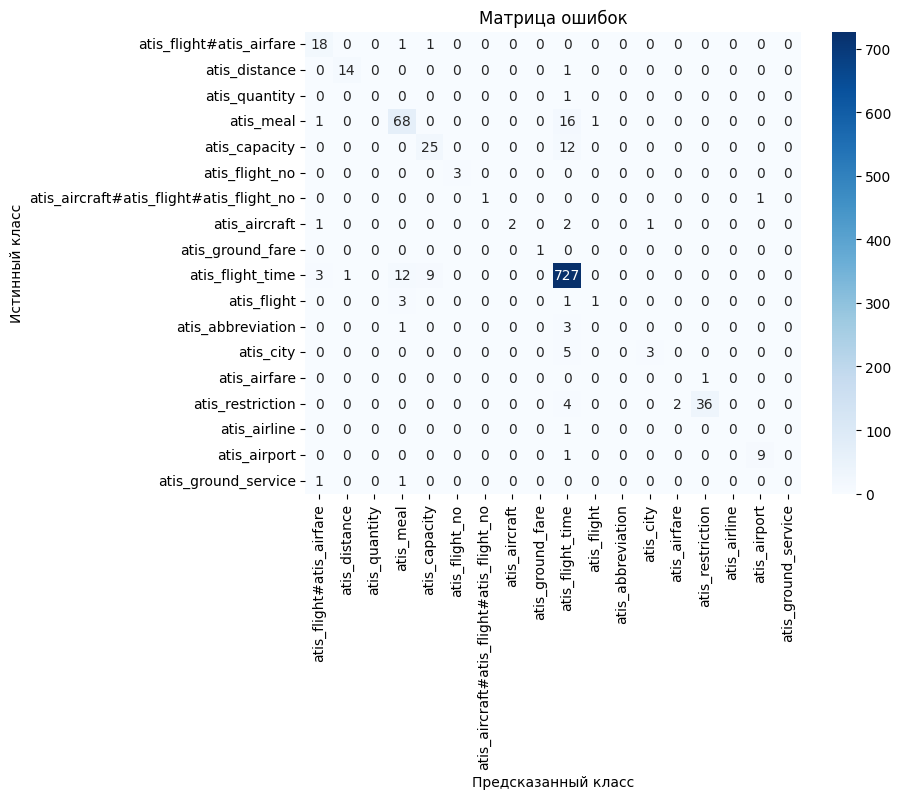

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Построение матрицы ошибок
conf_matrix = confusion_matrix(test_data['intent'], predictions)

# Визуализация матрицы ошибок с использованием seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(test_data['intent']), yticklabels=set(test_data['intent']))
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()
